In [1]:
from mdcrow import MDCrow
import os 
import mdtraj as md

In [2]:
descriptive_prompt_6 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area)."
non_descriptive_prompt_6 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD, SASA, and radius of gyration of the simulation."

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy
- SASA

In [3]:
llm_model = "claude-3-opus-20240229"
tools = "all"

In [4]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_6)

Thought: To complete the tasks, I will need to download the PDB file, analyze its structure, run a short simulation, and compute various properties. I will start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
  "action": "GetTurnsBetaSheetsHelices",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": "P00720"
  }
}
```

The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
It looks like the GetTurnsBetaSheetsHelices tool did not return the expected structural informatio

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_211222: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_211222
 1LYZ_211305: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_211318: Initial positions for simulation sim0_211318
 sim0_211318: Basic Simulation of Protein 1LYZ_211305
 rec0_211318: Simulation trajectory for protein 1LYZ_211305 and simulation sim0_211318
 rec1_211318: Simulation state log for protein 1LYZ_211305 and simulation sim0_211318
 rec2_211318: Simulation pdb frames for protein 1LYZ_211305 and simulation sim0_211318
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_211342: RMSD plot for 1LYZ
 rgy_rec0_211318: Radii of gyration per frame for rec0_211318
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_211428: Plot of SASA over time for 1LYZ


In [7]:
traj_path = registry.get_mapped_path("rec0_211318")
top_path = registry.get_mapped_path("top_sim0_211318")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path('rgy_rec0_211318'))
assert os.path.exists(registry.get_mapped_path('rmsd_1LYZ'))
assert os.path.exists(registry.get_mapped_path('sasa_1LYZ'))

In [8]:
traj = md.load(traj_path, top=top_path)
traj = traj[-1]
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  10
Number of helices:  55
Number of coils:  64


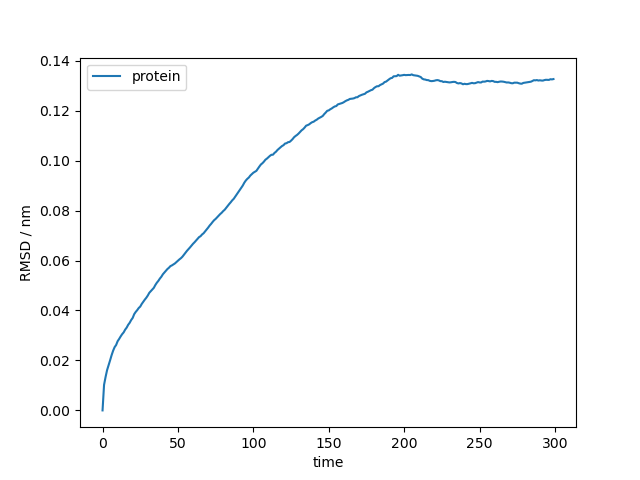

In [9]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_211342'))

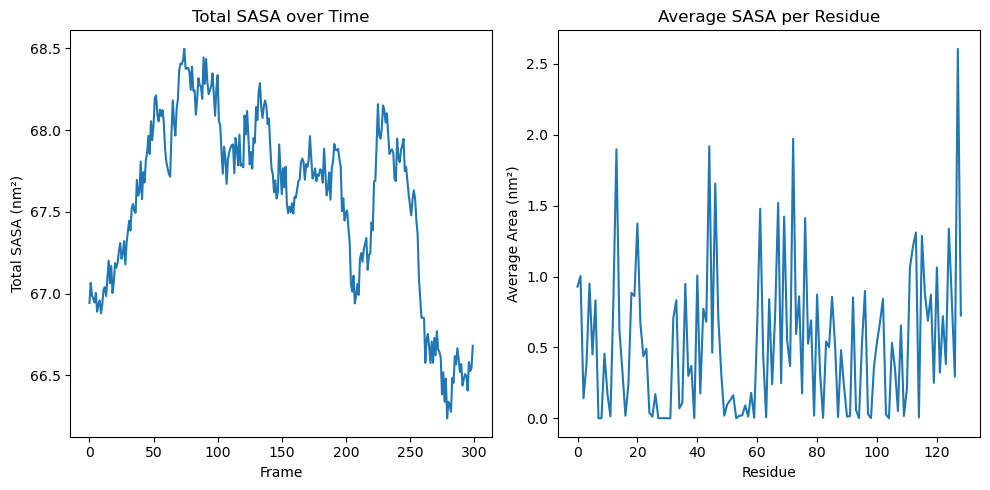

In [10]:
#plot sasa
Image(filename=registry.get_mapped_path('fig0_211428'))

In [11]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_6)

Thought: To simulate 1LYZ and analyze the results, I will first need to download the PDB file. Then I can set up and run a short 1 ps simulation at 300 K. After the simulation, I can analyze the trajectory to get the requested information about the protein structure and dynamics.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Here are the next steps to continue the simulation and analysis of 1LYZ:

Thought: Now that I have the 1LYZ PDB file, I can set up and run a short 1 ps simulation at 300 K using the SetUpandRunFunction tool. I will use default parameters for the system, integrator, and simulation, but set the temperature to 300 K and the number of steps to 500 to get 1 ps total simulation time.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_211659",
    "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
    "system_params": {
      "nonbondedMethod": 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [12]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_211659: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_211659
 1LYZ_211802: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_211814: Initial positions for simulation sim0_211814
 sim0_211814: Basic Simulation of Protein 1LYZ_211802
 rec0_211818: Simulation trajectory for protein 1LYZ_211802 and simulation sim0_211814
 rec1_211818: Simulation state log for protein 1LYZ_211802 and simulation sim0_211814
 rec2_211818: Simulation pdb frames for protein 1LYZ_211802 and simulation sim0_211814
 rec0_212940: dssp values for trajectory with id: rec0_211818
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_212949: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_213841: Plot of SASA over time for 1LYZ
 rgy_rec0_211818: Radii of gyration per frame for rec0_211818


In [13]:
traj_path = registry.get_mapped_path("rec0_211818")
top_path = registry.get_mapped_path("top_sim0_211814")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path('sasa_1LYZ'))
assert os.path.exists(registry.get_mapped_path('rmsd_1LYZ'))
assert os.path.exists(registry.get_mapped_path('rgy_rec0_211818'))

In [14]:
traj = md.load(traj_path, top=top_path)
traj = traj[-1]
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  3
Number of sheets:  14
Number of helices:  50
Number of coils:  65


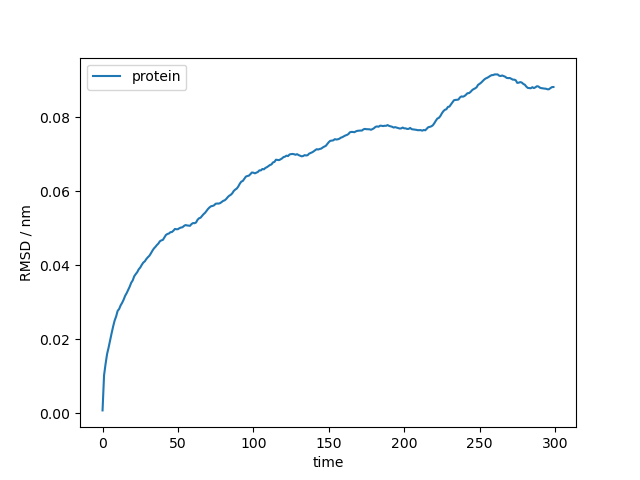

In [16]:
#rmsd
Image(filename=registry.get_mapped_path('fig0_212949'))

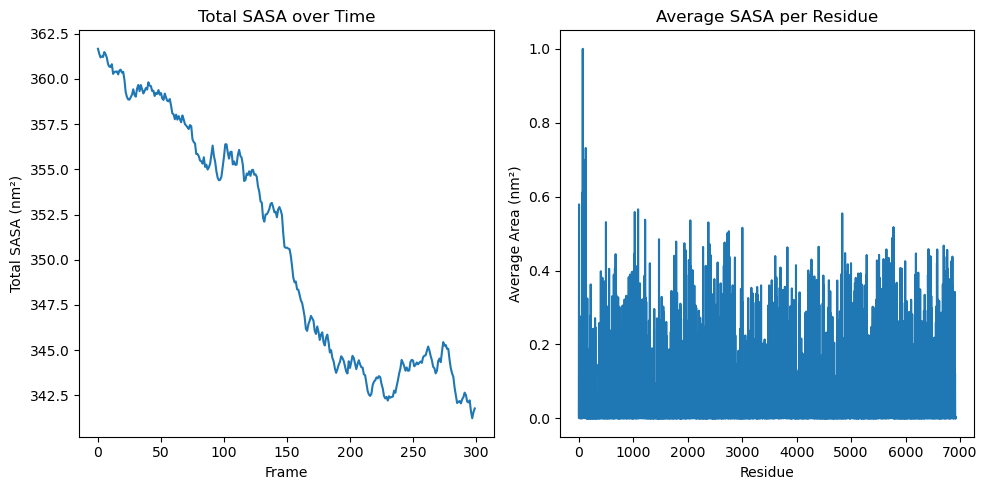

In [17]:
#sasa
Image(filename=registry.get_mapped_path('fig0_213841'))